# Problem 1

In [1]:
import sympy as sy
import numpy as np

In [2]:
x = sy.symbols('x')

In [3]:
f1 = sy.lambdify(x,(sy.sin(x)+1)**(sy.sin(sy.cos(x))),'numpy')

In [4]:
f2 = sy.lambdify(x,sy.diff((sy.sin(x)+1)**(sy.sin(sy.cos(x))), x),'numpy')

In [5]:
xgrid = np.linspace(-np.pi, np.pi, num=100)

In [6]:
from matplotlib import pyplot as plt
ax = plt.gca()
ax.spines["bottom"].set_position("zero")
plt.plot(f1(xgrid), label='f1')
plt.plot(f2(xgrid), label='f2')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

# Problem 2

In [7]:
h = max(np.max(np.absolute(xgrid)),1)*np.sqrt(np.finfo(float).eps)

In [8]:
def forward_order1(f, x, h):
    return (f(x+h)-f(x))/h

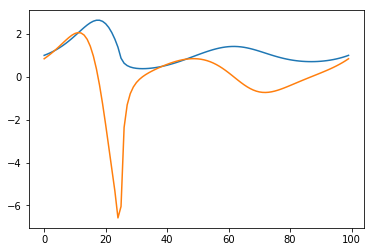

In [9]:
plt.plot(f1(xgrid))
plt.plot(forward_order1(f1, xgrid, h))
plt.show()

In [10]:
def forward_order2(f, x, h):
    return (-3*f(x) + 4*f(x+h) - f(x+2*h))/(2*h)

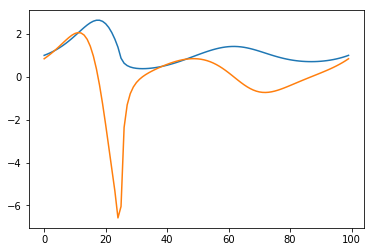

In [11]:
plt.plot(f1(xgrid))
plt.plot(forward_order2(f1, xgrid, h))
plt.show()

In [12]:
def backward_order1(f, x, h):
    return (f(x)-f(x-h))/h

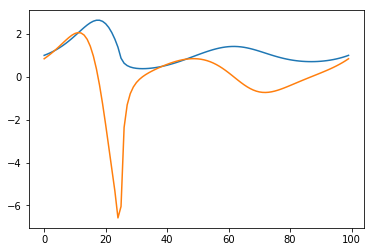

In [13]:
plt.plot(f1(xgrid))
plt.plot(backward_order1(f1, xgrid, h))
plt.show()

In [14]:
def backward_order2(f, x, h):
    return (3*f(x)-4*f(x-h)+f(x-2*h))/(2*h)

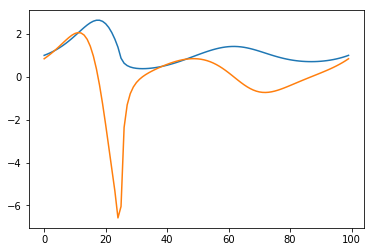

In [15]:
plt.plot(f1(xgrid))
plt.plot(backward_order2(f1, xgrid, h))
plt.show()

In [16]:
def centered_order2(f, x, h):
    return (f(x+h)-f(x-h))/(2*h)

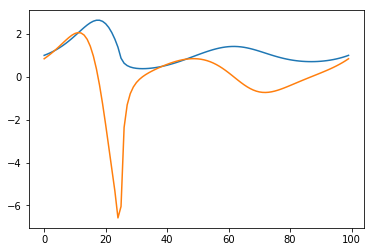

In [17]:
plt.plot(f1(xgrid))
plt.plot(centered_order2(f1, xgrid, h))
plt.show()

In [18]:
def centered_order4(f, x, h):
    return((f(x-2*h) - 8*f(x-h) + 8*f(x+h)-f(x+2*h))/(12*h))

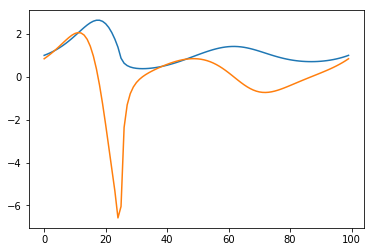

In [19]:
plt.plot(f1(xgrid))
plt.plot(centered_order2(f1, xgrid, h))
plt.show()

# Problem 3

In [20]:
x0 = 1

In [21]:
hgrid = np.logspace(-8, 0, 9)

In [22]:
o1f_err = np.absolute(f2(x0) - forward_order1(f1, x0, hgrid))
o2f_err = np.absolute(f2(x0) - forward_order2(f1, x0, hgrid))
o1b_err = np.absolute(f2(x0) - backward_order1(f1, x0, hgrid))
o2b_err = np.absolute(f2(x0) - backward_order2(f1, x0, hgrid))
o2c_err = np.absolute(f2(x0) - centered_order2(f1, x0, hgrid))
o4c_err = np.absolute(f2(x0) - centered_order4(f1, x0, hgrid))

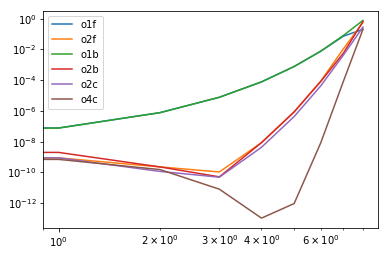

In [40]:
plt.loglog(o1f_err, label="o1f")
plt.loglog(o2f_err, label="o2f")
plt.loglog(o1b_err, label="o1b")
plt.loglog(o2b_err, label="o2b")
plt.loglog(o2c_err, label="o2c")
plt.loglog(o4c_err, label="o4c")
plt.legend()
plt.show()

# Problem 5

In [24]:
y = sy.symbols('y')

In [25]:
F = sy.Matrix(([x**2, x**3-y]))

In [26]:
F

Matrix([
[    x**2],
[x**3 - y]])

In [27]:
F_l = sy.lambdify((x,y), F)

In [28]:
J = F.jacobian((x,y))

In [29]:
J

Matrix([
[   2*x,  0],
[3*x**2, -1]])

In [30]:
J_l = sy.lambdify((x,y), J)

In [31]:
J_l(1,1)

array([[ 2,  0],
       [ 3, -1]])

In [32]:
def prob5(f, x, h):
    j = f(*sy.flatten(x)).shape[0]
    ret_jacobian = np.empty([j, len(x)])
    for i in range(1,j+1):
        temp_e = np.eye(1,j,i-1)
        temp_arg1 = np.array((x + h*temp_e)).flatten()
        temp_arg2 = np.array((x - h*temp_e)).flatten()
        ret_jacobian[i-1] = ((f(*sy.flatten(temp_arg1)) - f(*sy.flatten(temp_arg2)))/(2*h)).flatten()
    return ret_jacobian.T

In [33]:
prob5(F_l, np.array((1,1)),h)

array([[ 2.,  0.],
       [ 3., -1.]])

# Problem 6

In [34]:
from autograd import numpy as anp
from autograd import grad
from autograd import elementwise_grad

In [35]:
def prob6(x,n):
    if n==0:
        return anp.ones_like(x)
    elif n==1:
        return x
    else:
        return 2*x*prob6(x,n-1)-prob6(x,n-2)

In [36]:
xgrid = anp.linspace(-1,1,100)

In [37]:
d_cheb = elementwise_grad(prob6)

In [38]:
from matplotlib import pyplot as plt

/Users/rayhanmomin/anaconda3/lib/python3.7/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


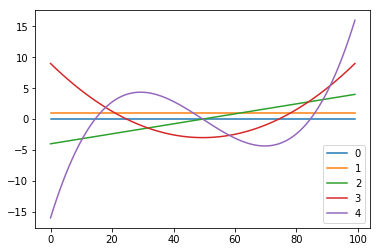

In [39]:
for i in range(0,5):
    plt.plot(d_cheb(xgrid,i), label = str(i))
plt.legend()
plt.show()